<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
print(df[['Employment', 'JobSat', 'RemoteWork']].isna().sum())

# Ver porcentaje de valores faltantes
print(df[['Employment', 'JobSat', 'RemoteWork']].isna().mean() * 100)
df_job = df.dropna(subset=['JobSat'])
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
print(df.isna().sum()[['Employment', 'JobSat', 'RemoteWork']])


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64


/tmp/ipykernel_785/2019694466.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)


Employment        0
JobSat        36311
RemoteWork        0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_785/1547291709.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_785/1547291709.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ExperienceRange')['JobSat']
/tmp/ipykernel_785/1547291709.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_satisfaction, x='Exper

📊 Mediana de satisfacción laboral por rango de experiencia:

  ExperienceRange  MedianJobSat
0        0-5 años           7.0
1       5-10 años           7.0
2      10-20 años           7.0
3        20+ años           8.0


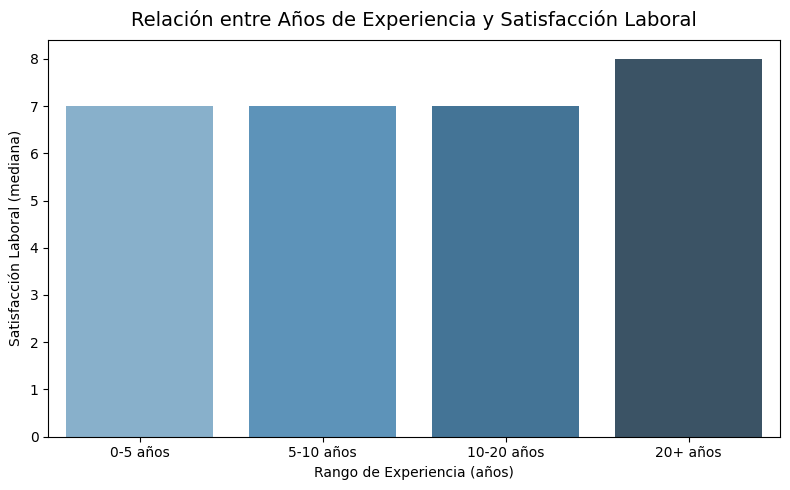

In [4]:
## Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 🔹 1. Limpieza y preparación de datos
# ============================================================

# Suponiendo que ya tenés el DataFrame cargado:
# df = pd.read_csv("data.csv")

# Convertir YearsCodePro a numérico, manejando textos especiales
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50
}).astype(float)

# Eliminar filas donde JobSat o YearsCodePro estén vacíos
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Si JobSat es categórico (texto), convertirlo a escala numérica (ejemplo)
# Ajustá este mapeo según tus datos reales
mapa_satisfaccion = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}

if df['JobSat'].dtype == 'object':
    df['JobSat'] = df['JobSat'].map(mapa_satisfaccion)

# ============================================================
# 🔹 2. Crear rangos de experiencia
# ============================================================

bins = [0, 5, 10, 20, np.inf]
labels = ['0-5 años', '5-10 años', '10-20 años', '20+ años']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# ============================================================
# 🔹 3. Calcular la mediana de satisfacción por rango
# ============================================================

median_satisfaction = (
    df.groupby('ExperienceRange')['JobSat']
    .median()
    .reset_index()
    .rename(columns={'JobSat': 'MedianJobSat'})
)

print("📊 Mediana de satisfacción laboral por rango de experiencia:\n")
print(median_satisfaction)

# ============================================================
# 🔹 4. Visualización
# ============================================================

plt.figure(figsize=(8,5))
sns.barplot(data=median_satisfaction, x='ExperienceRange', y='MedianJobSat', palette='Blues_d')

plt.title('Relación entre Años de Experiencia y Satisfacción Laboral', fontsize=14, pad=10)
plt.xlabel('Rango de Experiencia (años)')
plt.ylabel('Satisfacción Laboral (mediana)')
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_785/2502456729.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='viridis', order=sorted(df['JobSat'].unique()))


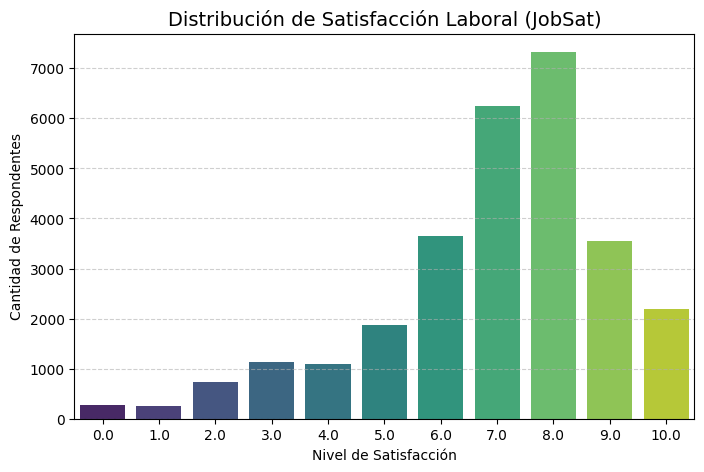

In [5]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Verificar que JobSat exista ---
if 'JobSat' not in df.columns:
    raise KeyError("La columna 'JobSat' no existe en el DataFrame.")

# --- 2️⃣ Visualización con count plot ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobSat', palette='viridis', order=sorted(df['JobSat'].unique()))
plt.title('Distribución de Satisfacción Laboral (JobSat)', fontsize=14)
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Cantidad de Respondentes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_785/926427000.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')


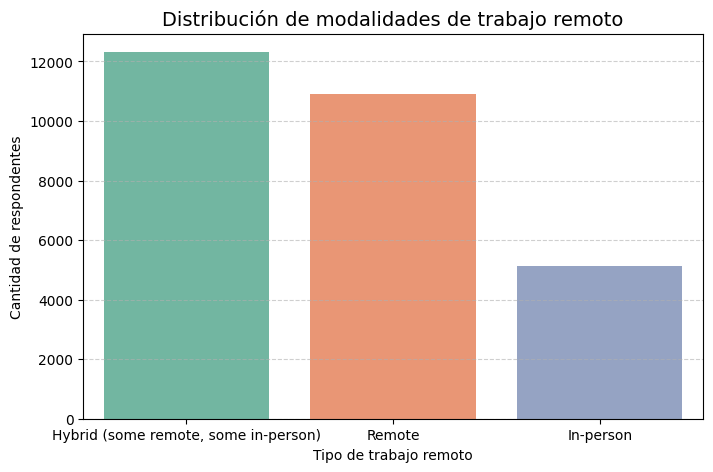


📊 Tabla de contingencia: RemoteWork vs Employment
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 9755   
Employed, full-time;Employed, part-time                                               48   
Employed, full-time;Independent contractor, fre...                                   800   
Employed, full-time;Independent contractor, fre...                                    52   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     3   
Student, full-time;Student, p

/tmp/ipykernel_785/926427000.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


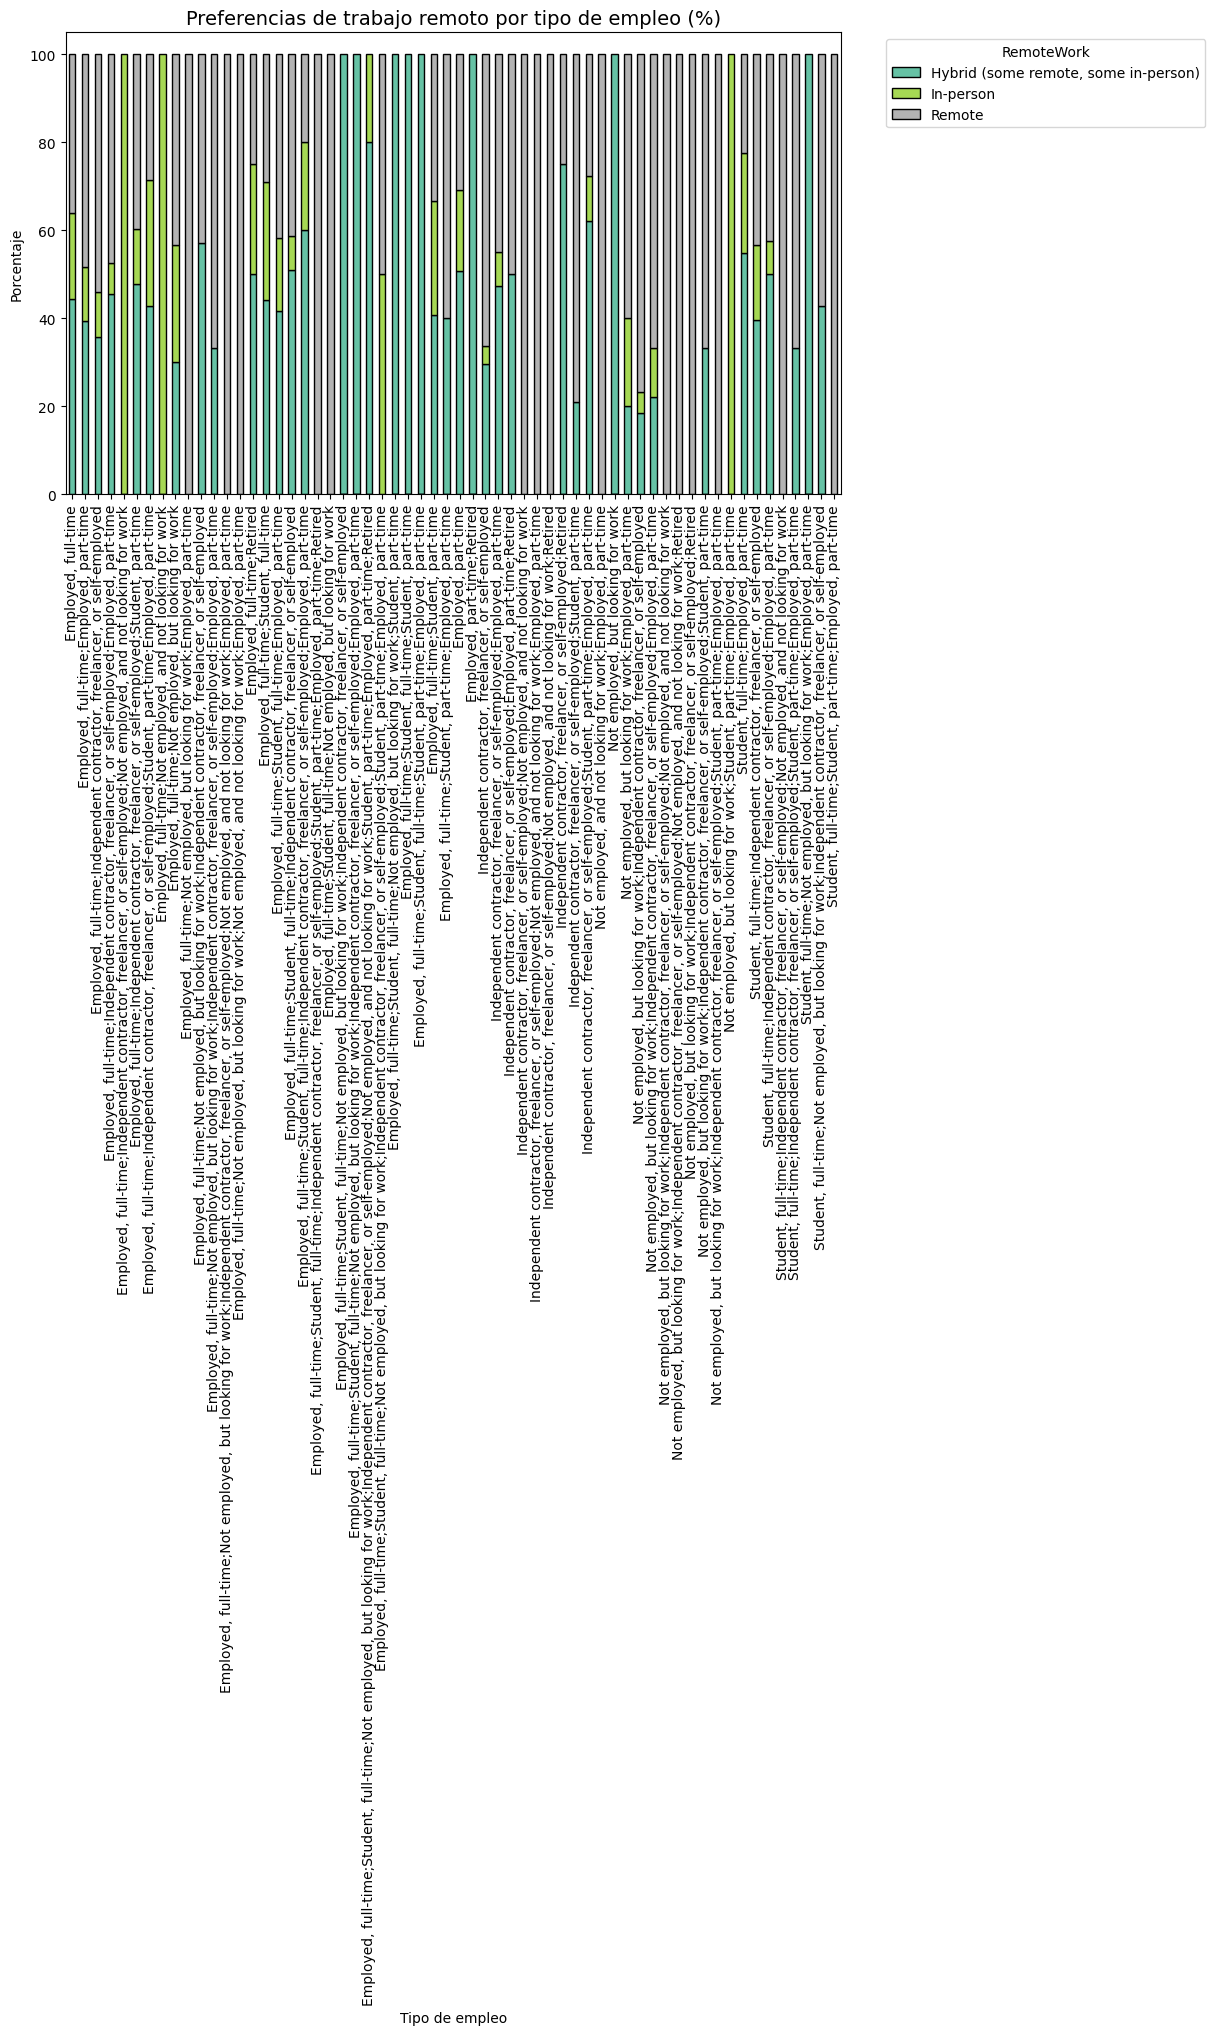

In [6]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Verificar que existan las columnas necesarias ---
for col in ['RemoteWork', 'Employment']:
    if col not in df.columns:
        raise KeyError(f"La columna '{col}' no existe en el DataFrame.")

# --- 2️⃣ Distribución general de RemoteWork con count plot ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')
plt.title('Distribución de modalidades de trabajo remoto', fontsize=14)
plt.xlabel('Tipo de trabajo remoto')
plt.ylabel('Cantidad de respondentes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- 3️⃣ Cross-tabulación de RemoteWork vs Employment ---
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True)
print("\n📊 Tabla de contingencia: RemoteWork vs Employment")
print(remote_by_employment)

# --- 4️⃣ Cross-tabulación con porcentaje por fila (opcional) ---
remote_by_employment_pct = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print("\n📊 Porcentaje de preferencias de RemoteWork por tipo de empleo:")
print(remote_by_employment_pct.round(2))

# --- 5️⃣ Visualización de RemoteWork por Employment (apilado) ---
remote_by_employment_pct.iloc[:-1,:].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2', edgecolor='black')
plt.title('Preferencias de trabajo remoto por tipo de empleo (%)', fontsize=14)
plt.xlabel('Tipo de empleo')
plt.ylabel('Porcentaje')
plt.legend(title='RemoteWork', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Top 10 lenguajes en United States:
Series([], Name: count, dtype: int64)


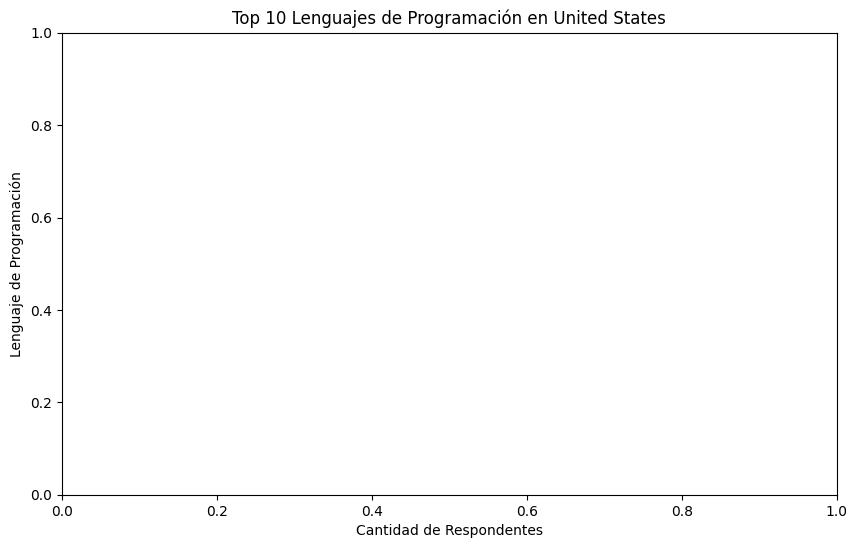

/tmp/ipykernel_785/2334222181.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['LanguageHaveWorkedWith'] = df_countries['LanguageHaveWorkedWith'].str.split(';')


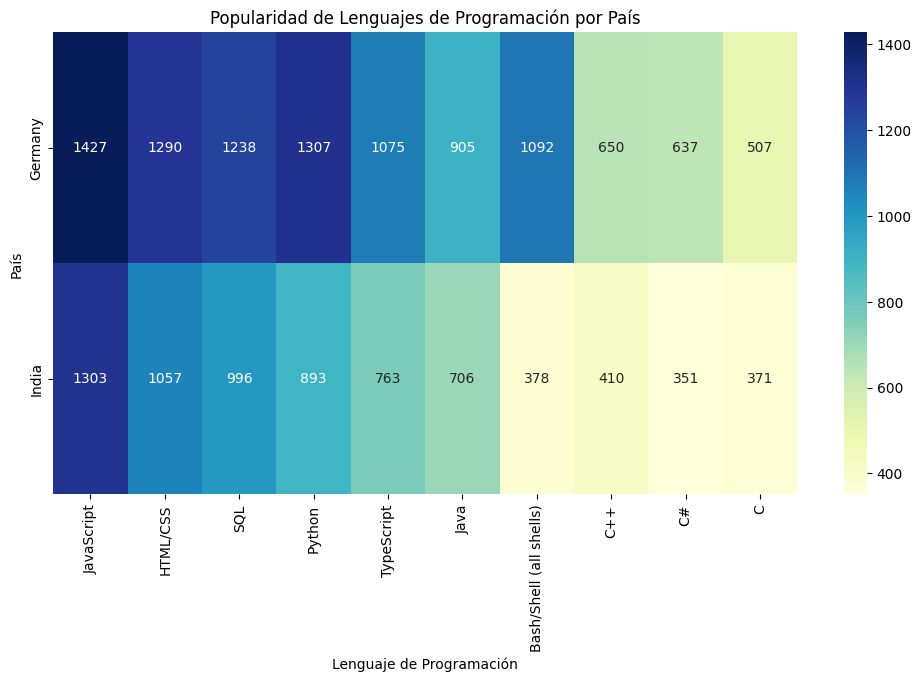

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Verificar columnas necesarias ---
for col in ['LanguageHaveWorkedWith', 'Country']:
    if col not in df.columns:
        raise KeyError(f"La columna '{col}' no existe en el DataFrame.")

# --- 2️⃣ Filtrar por región o país (opcional) ---
# Ejemplo: analizar solo encuestados de Estados Unidos
region_filter = 'United States'
df_region = df[df['Country'] == region_filter]

# --- 3️⃣ Preparar los datos ---
# La columna LanguageHaveWorkedWith suele ser una lista separada por ; o ,
# Aquí asumimos que es ';' como en Stack Overflow Survey
df_region['LanguageHaveWorkedWith'] = df_region['LanguageHaveWorkedWith'].str.split(';')

# Explode para tener un registro por lenguaje
df_languages = df_region.explode('LanguageHaveWorkedWith')

# Contar la cantidad de veces que aparece cada lenguaje
language_counts = df_languages['LanguageHaveWorkedWith'].value_counts().head(10)
print(f"Top 10 lenguajes en {region_filter}:")
print(language_counts)

# --- 4️⃣ Visualización: Bar plot ---
plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')
plt.title(f'Top 10 Lenguajes de Programación en {region_filter}')
plt.xlabel('Cantidad de Respondentes')
plt.ylabel('Lenguaje de Programación')
plt.show()

# --- 5️⃣ Visualización alternativa: Heatmap por país/región (opcional) ---
# Podemos crear un pivot table con países y lenguajes
# Ejemplo para múltiples países
countries = ['United States', 'India', 'Germany']  # lista de ejemplo
df_countries = df[df['Country'].isin(countries)]
df_countries['LanguageHaveWorkedWith'] = df_countries['LanguageHaveWorkedWith'].str.split(';')
df_languages_all = df_countries.explode('LanguageHaveWorkedWith')

# Pivot table: filas = país, columnas = lenguaje, valores = conteo
language_pivot = pd.crosstab(df_languages_all['Country'], df_languages_all['LanguageHaveWorkedWith'])

# Solo tomar los 10 lenguajes más populares globalmente
top_langs = df_languages_all['LanguageHaveWorkedWith'].value_counts().head(10).index
language_pivot = language_pivot[top_langs]

plt.figure(figsize=(12,6))
sns.heatmap(language_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Popularidad de Lenguajes de Programación por País')
plt.xlabel('Lenguaje de Programación')
plt.ylabel('País')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Coeficiente de correlación de Pearson: -0.032


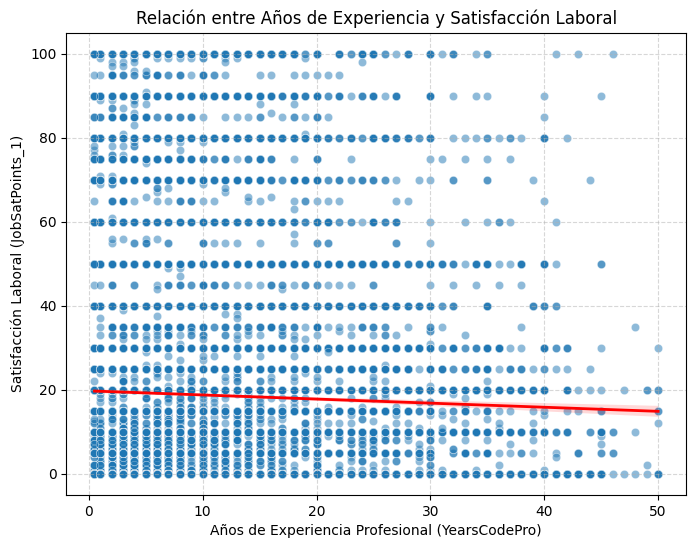

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Verificar que existan las columnas ---
for col in ['YearsCodePro', 'JobSatPoints_1']:
    if col not in df.columns:
        raise KeyError(f"La columna '{col}' no existe en el DataFrame.")

# --- 2️⃣ Limpieza de datos ---
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50
}).astype(float)

df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Eliminar filas con valores nulos
df_corr = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# --- 3️⃣ Calcular correlación usando pandas ---
corr_coef = df_corr['YearsCodePro'].corr(df_corr['JobSatPoints_1'])
print(f"Coeficiente de correlación de Pearson: {corr_coef:.3f}")

# --- 4️⃣ Scatter plot con línea de tendencia ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
sns.regplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red', line_kws={'linewidth':2})

plt.title('Relación entre Años de Experiencia y Satisfacción Laboral')
plt.xlabel('Años de Experiencia Profesional (YearsCodePro)')
plt.ylabel('Satisfacción Laboral (JobSatPoints_1)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


📊 Tabla de contingencia: Educación vs Tipo de Empleo

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 655   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10281   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6496   
Primary/elementary school                                            87   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1110   
Secondary school (e.g. American high school, Ge...                  854   
Some college/university study without earning a...                 2216   
Something else                                                      204   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Assoc

/tmp/ipykernel_785/2598469.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


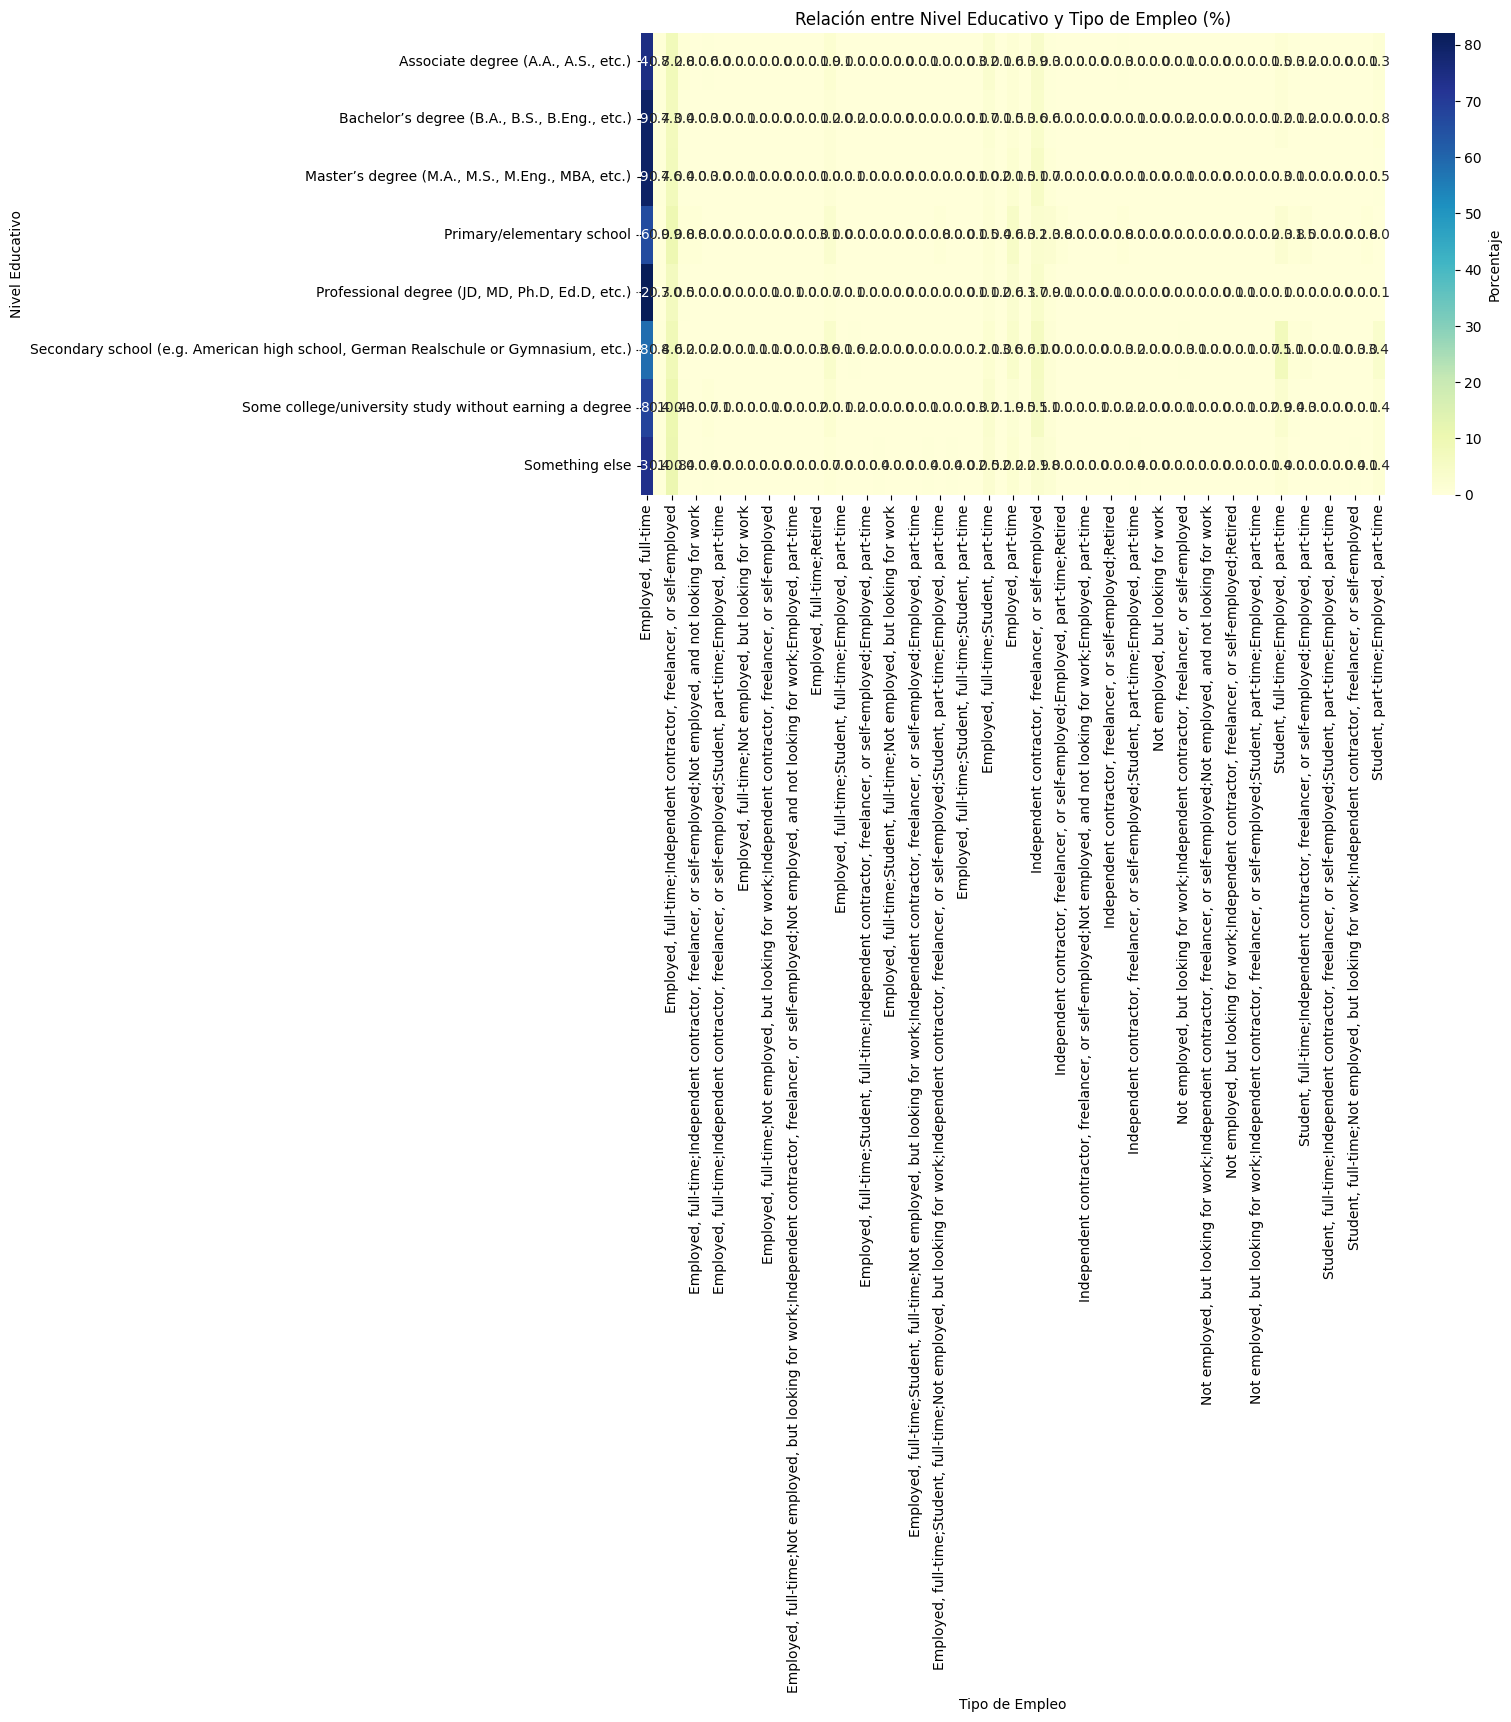

/tmp/ipykernel_785/2598469.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


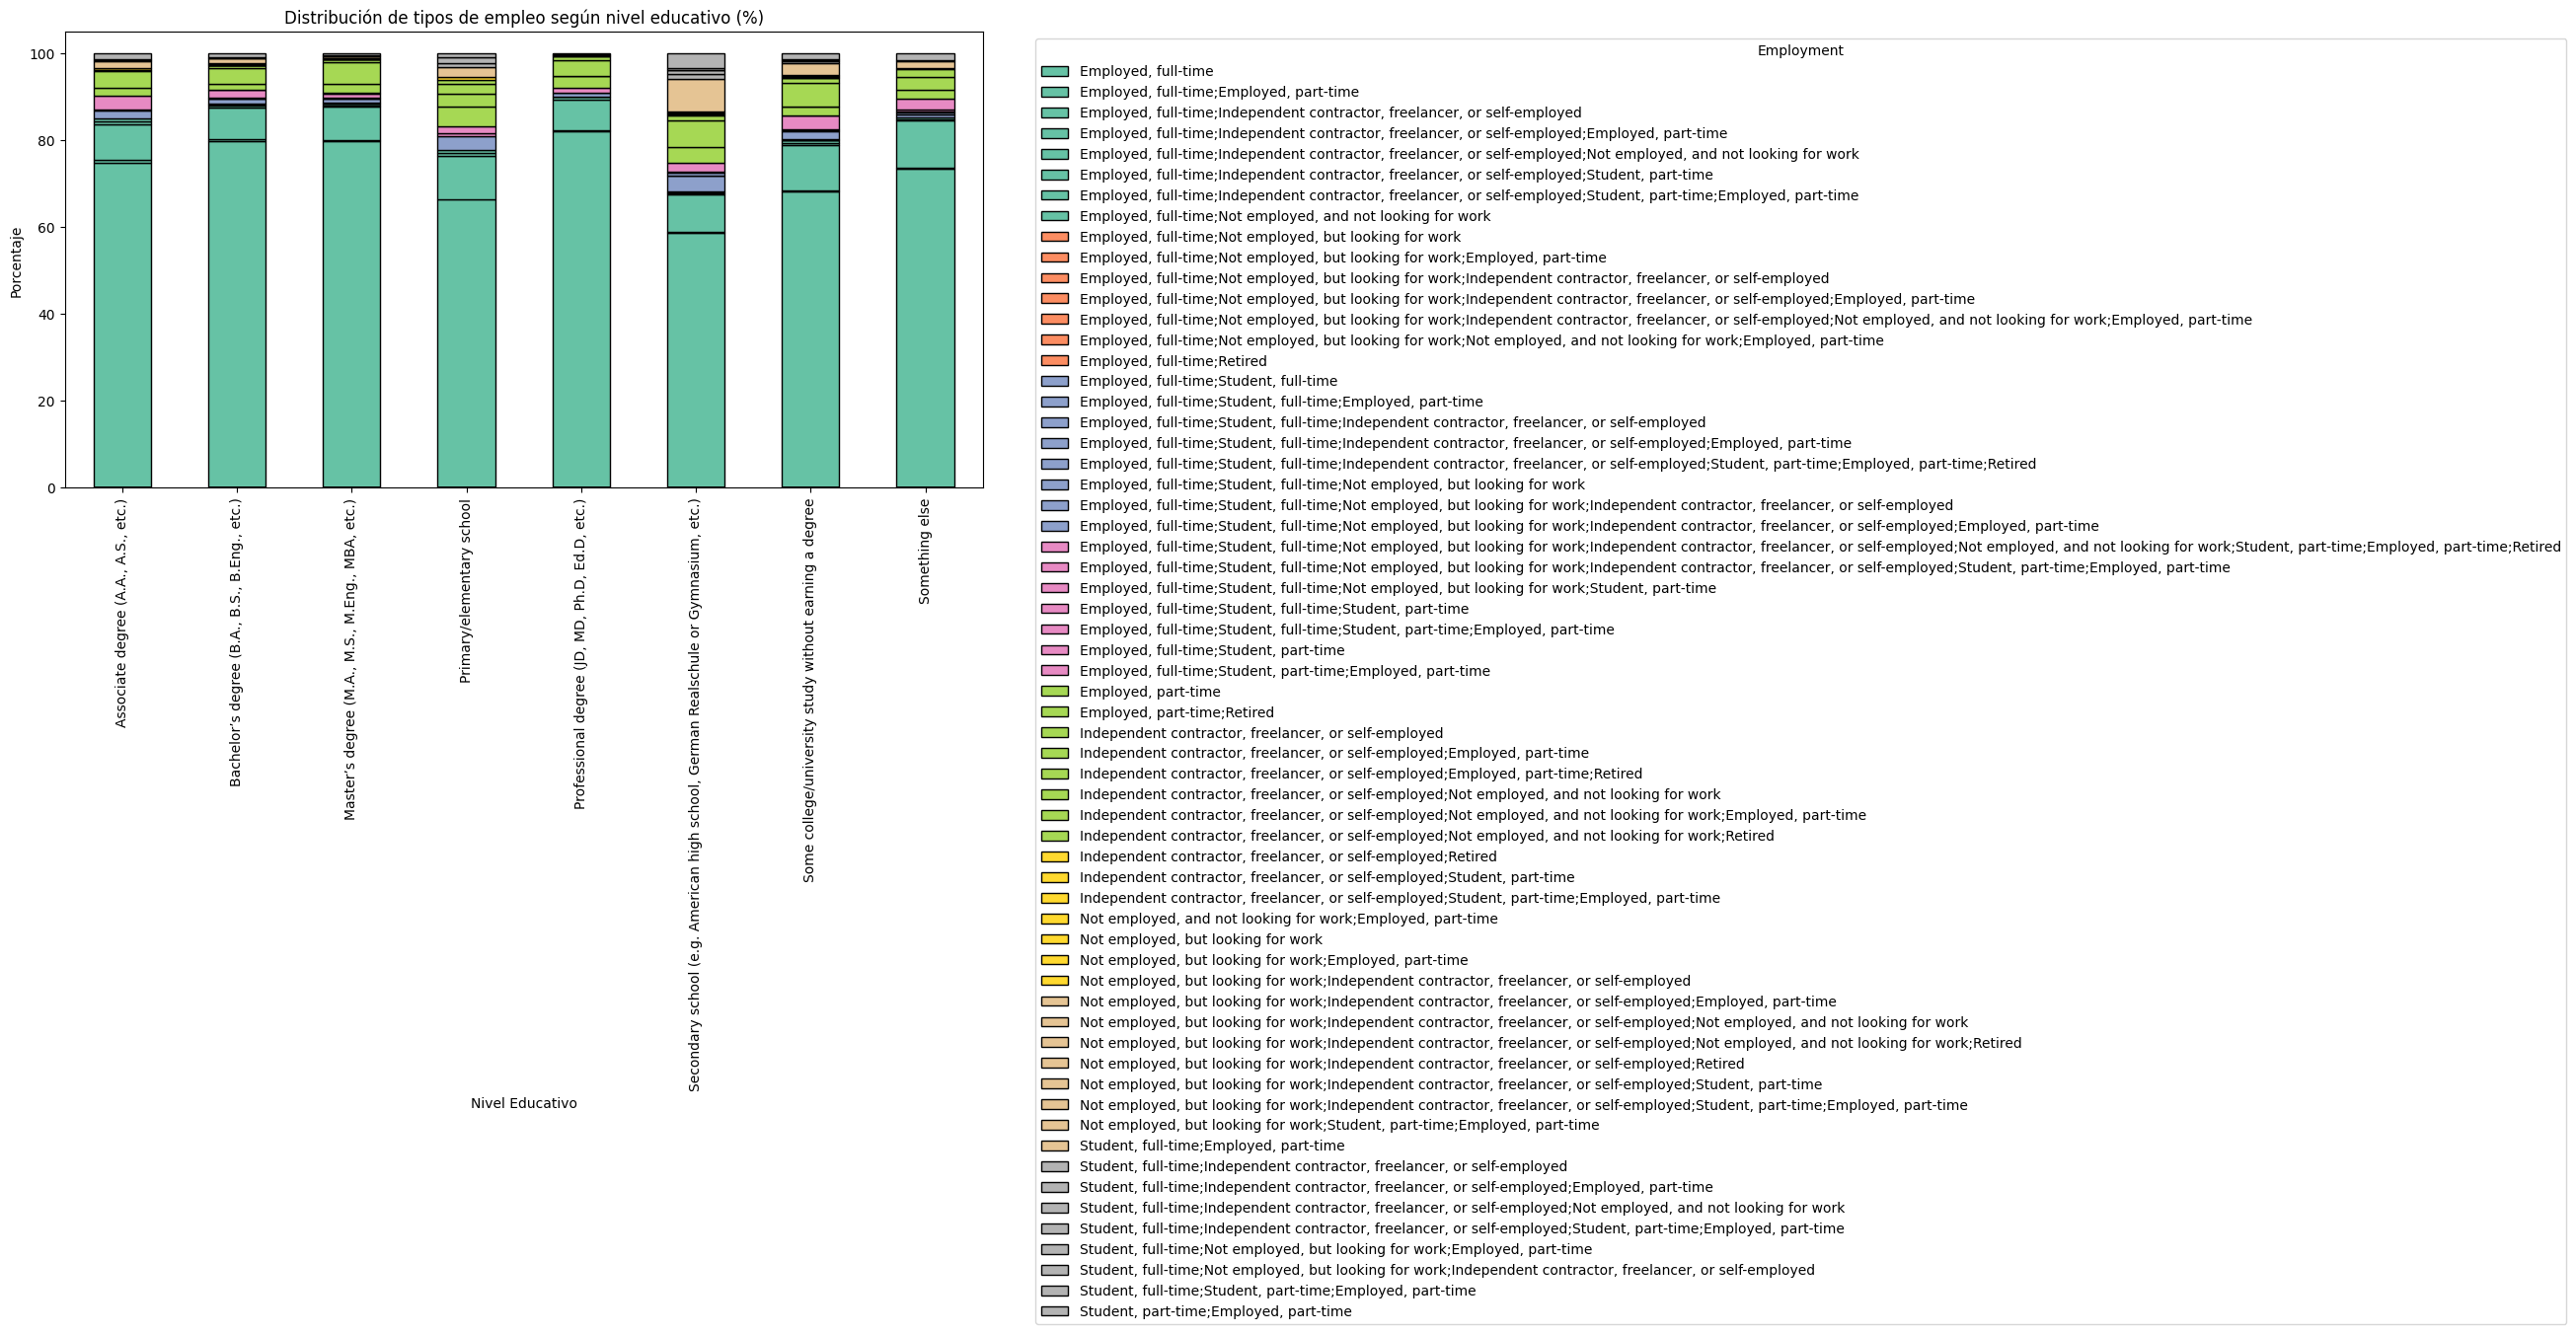

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Verificar que existan las columnas necesarias ---
for col in ['EdLevel', 'Employment']:
    if col not in df.columns:
        raise KeyError(f"La columna '{col}' no existe en el DataFrame.")

# --- 2️⃣ Limpiar filas con valores nulos ---
df_edu = df.dropna(subset=['EdLevel', 'Employment'])

# --- 3️⃣ Cross-tabulation: EdLevel vs Employment ---
edu_employment_ct = pd.crosstab(df_edu['EdLevel'], df_edu['Employment'])
print("📊 Tabla de contingencia: Educación vs Tipo de Empleo\n")
print(edu_employment_ct)

# --- 4️⃣ Cross-tabulation en porcentaje por fila (opcional) ---
edu_employment_pct = pd.crosstab(df_edu['EdLevel'], df_edu['Employment'], normalize='index') * 100
print("\n📊 Porcentaje de tipos de empleo por nivel educativo:\n")
print(edu_employment_pct.round(2))

# --- 5️⃣ Visualización: Heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(edu_employment_pct, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Porcentaje'})
plt.title('Relación entre Nivel Educativo y Tipo de Empleo (%)')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Nivel Educativo')
plt.tight_layout()
plt.show()

# --- 6️⃣ Visualización alternativa: Count plot apilado (opcional) ---
edu_employment_pct.iloc[:,:].plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2', edgecolor='black')
plt.title('Distribución de tipos de empleo según nivel educativo (%)')
plt.xlabel('Nivel Educativo')
plt.ylabel('Porcentaje')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [12]:
## Write your code here
# --- 1️⃣ Guardar como CSV ---
df.to_csv("dataset_limpio.csv", index=False)
print("✅ Dataset guardado como 'dataset_limpio.csv'")

# --- 2️⃣ (Opcional) Guardar como Excel ---
df.to_excel("dataset_limpio.xlsx", index=False)
print("✅ Dataset guardado como 'dataset_limpio.xlsx'")


✅ Dataset guardado como 'dataset_limpio.csv'


ModuleNotFoundError: No module named 'openpyxl'

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
